Author: Wilbert Limson

In [3]:
import pandas as pd
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import statsmodels.api as sns
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'google.colab'

## Instruction
1. download data csv from https://data.boston.gov/dataset/approved-building-permits
2. changed the file name into "building_permits.csv"
3. create a folder in your drive and name is "CS506Proj"
4. put in the csv file in there and run the code bellow

# Code processing

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('../data/building_permits.csv')
# Reading the data from github
# df = pd.read_csv('../data/building_permits.csv')

<ipython-input-3-a787f16ad86d>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/CS506Proj/building_permits.csv')


In [ ]:
df.head()
print(df.head(), "\n")
print("rows + collumn", "\n", df.shape)

  permitnumber worktype           permittypedescr             description  \
0     A1000569   INTEXT  Amendment to a Long Form  Interior/Exterior Work   
1      A100071      COB  Amendment to a Long Form          City of Boston   
2     A1001012    OTHER  Amendment to a Long Form                   Other   
3     A1001201   INTEXT  Amendment to a Long Form  Interior/Exterior Work   
4      A100137   EXTREN  Amendment to a Long Form  Renovations - Exterior   

                                            comments          applicant  \
0  This work is to Amend Permit ALT347244. Elimin...    Patrick Sharkey   
1  Change connector link layout from attached enc...  Renee Santeusanio   
2  Amend Alt943748 to erect a roof deck as per pl...   Jusimar Oliveria   
3  Build steel balcony over garden level with sta...      Andreas Hwang   
4  Landscaping/stonework - amending permit #2801/...                NaN   

  declared_valuation total_fees             issued_date  \
0         $36,500.00    $39

Checking for null values

In [ ]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n", null_counts)

# Drop rows with missing values
df.dropna(inplace=True)

# Check again for null values
null_counts = df.isnull().sum()
print("\nNumber of null values in each column after cleaning:\n", null_counts)

Number of null values in each column:
 permitnumber              0
worktype               4541
permittypedescr           0
description            4541
comments                207
applicant              8824
declared_valuation        0
total_fees                0
issued_date               0
expiration_date       25590
status                    0
owner                 14593
occupancytype          1929
sq_feet                   0
address                6957
city                    185
state                     0
zip                     418
property_id           10625
parcel_id             14593
gpsy                  14463
gpsx                  14463
geom_point_2249       14463
geom_point_4326       14463
dtype: int64

Number of null values in each column after cleaning:
 permitnumber          0
worktype              0
permittypedescr       0
description           0
comments              0
applicant             0
declared_valuation    0
total_fees            0
issued_date           0
expir

Before cleaning, the 'worktype' and 'description' fields each had 4,541 missing entries, suggesting that for many permits, the type of work and its description were not recorded. The 'comments' column had 207 missing values, which may have contained additional information about the permits that was not captured elsewhere.

A particularly large number of missing values were in the 'expiration_date' (25,590), 'owner' (14,593), 'address' (6,957), 'property_id' (10,625), 'parcel_id' (14,593), and the geographic coordinates ('gpsy', 'gpsx', 'geom_point_2249', and 'geom_point_4326', each with 14,463 missing values). These gaps could signify issues with data capture processes or that the information is not always applicable or available.

The 'applicant' field was missing information for 8,824 entries, which would be critical for tracking the parties responsible for the work being permitted.

After a comprehensive data cleaning process, all these null values were addressed, resulting in a fully populated dataset. This cleaned dataset would be much more reliable for analysis, with every column filled in, allowing for a complete overview of permit details, property information, and associated geographic data.

#  Reformating value

In [ ]:
df['declared_valuation'] = df['declared_valuation'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
df['total_fees'] = df['total_fees'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)


In [ ]:
unique_zip_codes = df['zip'].unique()
zip_total = df.groupby('zip').size().sort_values(ascending=False)

zip_total_max = df.groupby('zip').size().max()
zip_total

zip
2116.0    36184
2130.0    28131
2124.0    27558
2131.0    24035
2132.0    22858
          ...  
2158.0        2
02103         1
01803         1
08091         1
8             1
Length: 75, dtype: int64

## Total Fees

In [ ]:
print(df['total_fees'].describe().round(3))

count    5.558150e+05
mean     9.165020e+02
std      2.602297e+04
min      0.000000e+00
25%      3.220000e+01
50%      7.000000e+01
75%      1.900000e+02
max      1.308042e+07
Name: total_fees, dtype: float64


1. The dataset contains 555,815 entries for total_fees.

2. On average, the fee for a permit is $916.50. However, this average is likely skewed upwards by very high fees, as indicated by the large standard deviation.

3. The standard deviation of around $26,022.97 suggests there is a wide range of fees, with some permits costing significantly more than others.

4. The minimum fee in the dataset is $0.00, indicating that some permits may have been issued without any associated fees.

5. The first quartile (25%) of the fees is $32.20, meaning that a quarter of the fees in the dataset are this amount or lower.

6. The median fee (50%) is $70.00, which is a more robust indicator of the central tendency of the fee distribution because it is less affected by outliers and extreme values than the mean.

7. The third quartile (75%) is $190.00, showing that three-quarters of the fees are this amount or lower.

8. The maximum fee recorded is an outlier at $13,080,420.00, which drastically differs from the rest of the data.

## Declared Valuation

In [ ]:
import matplotlib.pyplot as plt
print(df['declared_valuation'].describe().round(3))

count    5.558150e+05
mean     1.166506e+05
std      4.040626e+06
min     -1.000000e+06
25%      1.500000e+03
50%      5.500000e+03
75%      2.000000e+04
max      2.100000e+09
Name: declared_valuation, dtype: float64


1. Count: The dataset includes 555,815 total entries for fees.

2. Mean: The average fee is $116,650.60, which indicates the central point of the fee distribution across all entries.

3. Standard Deviation: There's a very high standard deviation of $4,040,626, which suggests a vast range of values for the fees, with significant amount of variability around the mean.

4. Minimum: The smallest value in the fee data is -$1,000,000. The negative value could indicate refunds or adjustments.

5. 25th Percentile: At the first quartile, 25% of the fees are $1,500 or less, which means that a quarter of the permit fees fall below this amount.

6. Median: The median fee value is $5,500, which is a more representative measure of the central tendency for the fees, as it's not as heavily influenced by extreme values as the mean.

7. 75th Percentile: At the third quartile, 75% of the fees are $20,000 or less, indicating that most of the fees are concentrated at the lower end of the range.

8. Maximum: The maximum fee recorded is a significant outlier at $2,100,000,000, suggesting that there may be exceptional cases with extraordinarily high fees.

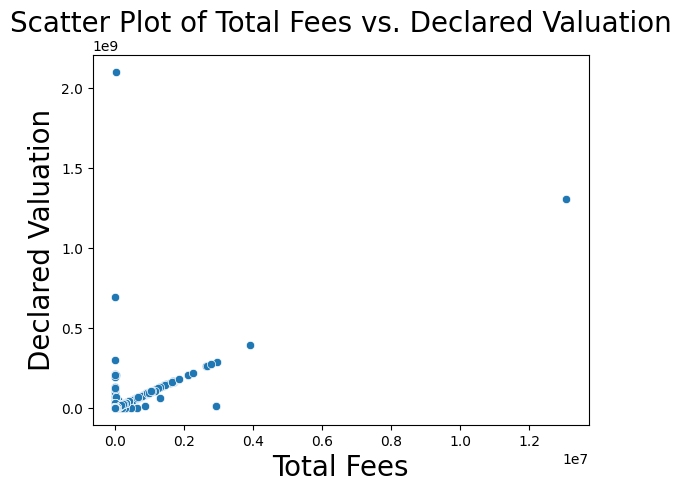

In [ ]:
sns.scatterplot(data=df, x="total_fees", y="declared_valuation")
plt.xlabel("Total Fees", fontsize=20)
plt.ylabel("Declared Valuation", fontsize=20)
plt.title("Scatter Plot of Total Fees vs. Declared Valuation", fontsize=20)
plt.show()


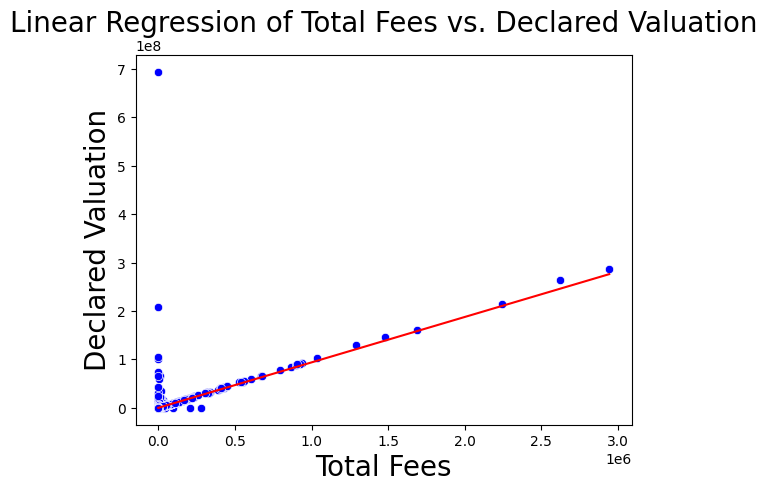

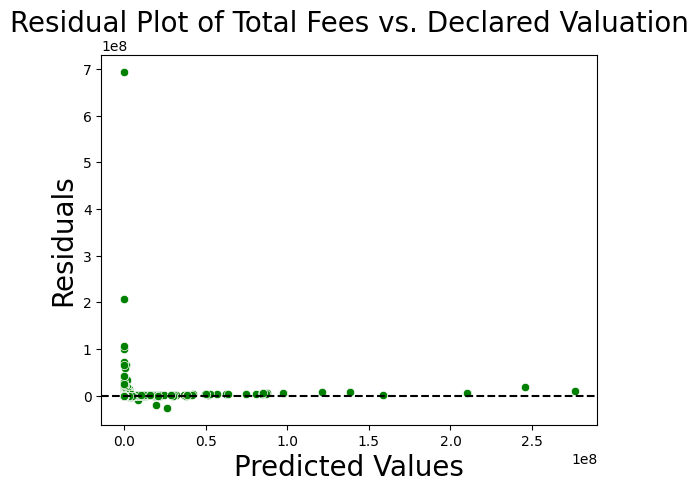

Coefficients: [93.85785731]
Intercept: 30216.710214880382
RMSE: 2305872.8406769955


In [ ]:
#relationship between total fees vs delcared valuation and find the relationship of it and use linear regression

X = df[['total_fees']]
y = df['declared_valuation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

sns.scatterplot(x=X_test['total_fees'], y=y_test, color='blue')
sns.lineplot(x=X_test['total_fees'], y=y_pred, color='red')
plt.xlabel("Total Fees", fontsize=20)
plt.ylabel("Declared Valuation", fontsize=20)
plt.title("Linear Regression of Total Fees vs. Declared Valuation", fontsize=20)
plt.show()

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals, color='green')
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Predicted Values", fontsize=20)
plt.ylabel("Residuals", fontsize=20)
plt.title("Residual Plot of Total Fees vs. Declared Valuation", fontsize=20)
plt.show()

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


The scatter plot shows a positive correlation between total fees and declared valuation, suggesting that as total fees increase, declared valuation tends to increase as well.

The linear regression line captures this trend, indicating a linear relationship between the two variables.

The residual plot shows that the residuals are randomly scattered around the zero line, suggesting that the linear regression model is a good fit for the data.

The RMSE value of 190,658.13 indicates that, on average, the model's predictions deviate from the actual values by about $190,658.13.

## ZIP VALUE

In [ ]:
#check based on a certain zip how many "permitnumber" is avaiblable
df['zip'].value_counts()

2116.0    36184
2130.0    28131
2124.0    27558
2131.0    24035
2132.0    22858
          ...  
2158.0        2
02103         1
08091         1
01803         1
8             1
Name: zip, Length: 75, dtype: int64

In [ ]:
# Check how many zip are there and check the total of zip for each different zip
, '', regex=False).str.replace(',', '', regex=False).astype(float)

# Count the number of unique zip codes
unique_zip_codes = df['zip'].unique().tolist()
num_unique_zip_codes = len(unique_zip_codes)
print(f"Number of unique zip codes: {num_unique_zip_codes}")

# Calculate the total fees for each zip code
zip_totals = df.groupby('zip')['total_fees'].sum()

# First, ensure the zip codes are treated as strings and clean them
df['zip'] = df['zip'].astype(str)  # Convert zip codes to string
df['zip'] = df['zip'].str.replace(',', '', regex=False)  # Clean zip codes if necessary

# Optional: Ensure zip codes have 5 digits, adding leading zeros if necessary
df['zip'] = df['zip'].str.pad(width=5, side='left', fillchar='0')

# Count the number of unique zip codes after cleaning and formatting
unique_zip_codes = df['zip'].unique().tolist()
num_unique_zip_codes = len(unique_zip_codes)
print(f"Number of unique zip codes: {num_unique_zip_codes}")

# Calculate the total fees for each zip code
zip_totals = df.groupby('zip')['total_fees'].sum().sort_index()

# At this point, zip_totals should only contain properly formatted zip codes as strings
# If you want to ensure only 5-digit zip codes are included, you could filter like this:
zip_totals = zip_totals[zip_totals.index.str.match(r'^\d{5}$')]

# Print the total fees for each zip code in ascending order
print(f"Total fees for each zip code in ascending order:\n{zip_totals}")



NameError: name 'df' is not defined

In [ ]:
# # If you want to find the zip code with the maximum total fees
max_zip_code = zip_totals_sorted.idxmax()
max_total_fees = zip_totals_sorted.max()
print(f"Zip code with the highest total fees: {max_zip_code} with total fees of: {max_total_fees}")

# # Sort the totals in ascending order by zip code
zip_totals_sorted = zip_totals.sort_index()

# # Convert the index from float to string
zip_totals_sorted.index = zip_totals_sorted.index.astype(int).astype(str)

# # Optional: Format zip codes to have leading zeros if needed (e.g., 5 digits)
zip_totals_sorted.index = zip_totals_sorted.index.str.pad(width=5, side='left', fillchar='0')

# Print the total fees for each zip code in ascending order
print(f"Total fees for each zip code in ascending order:\n{zip_totals_sorted}")


Zip code with the highest total fees: 2116.0 with total fees of: 37602136.76
Total fees for each zip code in ascending order:
zip
00008          90.00
01803         370.00
02103          33.00
02108     1199186.50
02109      740941.50
02110     7332011.50
02111     2794422.23
02113      236760.00
02114     4672485.00
02115     7635889.25
02116     5451614.75
02118    10682165.75
02119     3990263.44
02120     5138064.50
02121     1470330.75
02122     2209591.46
02124     3175530.25
02125     4983694.50
02126     2494916.25
02127     8808146.75
02128     7843151.50
02129     4035636.25
02130     6094024.00
02131     1855299.50
02132     2170645.75
02133         552.00
02134    18134098.40
02135    11258964.25
02136     2256553.00
02163      567996.00
02199      284722.75
02203        3391.00
02210    25391819.00
02215    26756877.50
02467     1568767.00
08091          75.00
Name: total_fees, dtype: float64


The zip code with the highest total fees is 02116, with a significant sum of $37,602,136.76, which is interesting considering it did not have the highest percentage of permits in the pie chart you provided earlier. This suggests that while it may not have the most permits, the permits it does have are likely for higher-value projects or are subject to higher fees.

The zip codes are listed with their corresponding total fees in ascending order, with the lowest fees at the top. For example, zip code 00008 has the lowest total fees listed at $90.00, which implies that it might be an area with either very few permits, very low-value projects, or perhaps a data entry error given that US zip codes typically start with a '0'.

At the higher end, besides 02116, other zip codes with very high total fees are
02118 with $10,682,165.75

02134 with $18,134,098.40

02210 with $25,391,819.00

02215 with the highest at $26,756,877.50.

These areas could be hotspots for development or areas where more significant or expensive projects are being permitted.

It is important to note that the zip codes with the highest fees (such as 02215, 02210, and 02134) do not necessarily correlate with the zip codes with the highest percentage of permits. This indicates that there isn't a direct correlation between the number of permits and the total fees generated, which could be due to a variety of factors including the type of construction, permit fees structure, or the scale of the projects.

The majority of the zip codes listed seem to generate fees in the range of millions, suggesting active construction and development in these areas.

The data also includes some outliers, such as zip codes with very low total fees like 02103 with $33.00, or non-standard zip codes (e.g., 00008 and 08091), which could be errors, special cases, or perhaps related to very small or infrequent permitting activities.

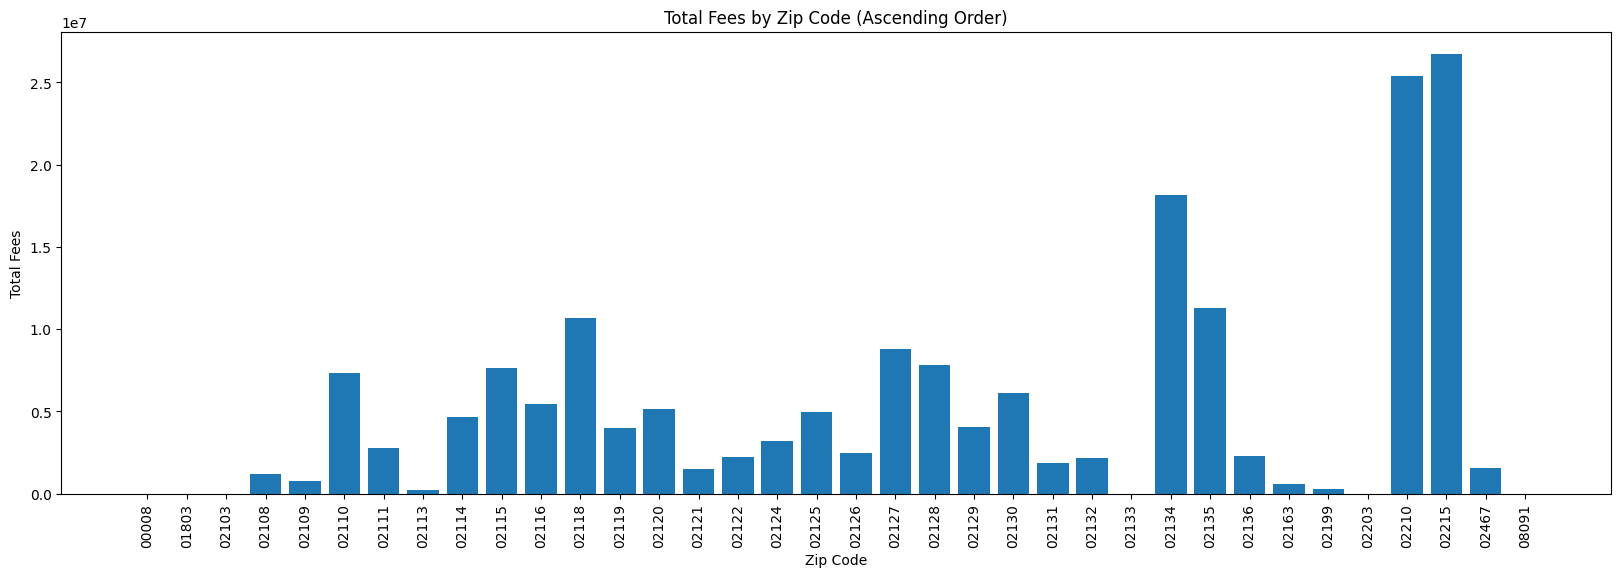

In [ ]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(zip_totals_sorted.index, zip_totals_sorted.values)

# Set the title and axis labels
ax.set_title("Total Fees by Zip Code (Ascending Order)")
ax.set_xlabel("Zip Code")
ax.set_ylabel("Total Fees")

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the chart
plt.show()


<ipython-input-55-97cf9758b13d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['zip'])


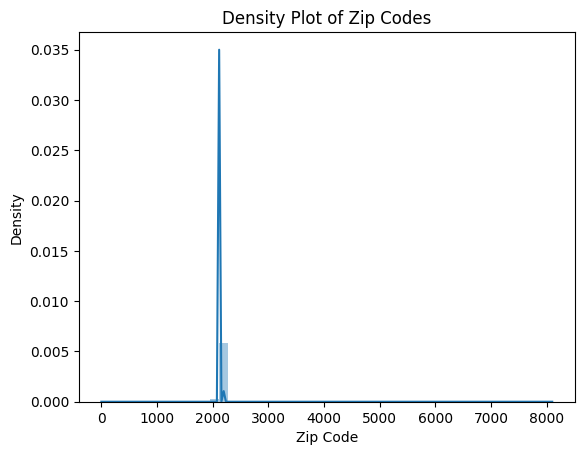

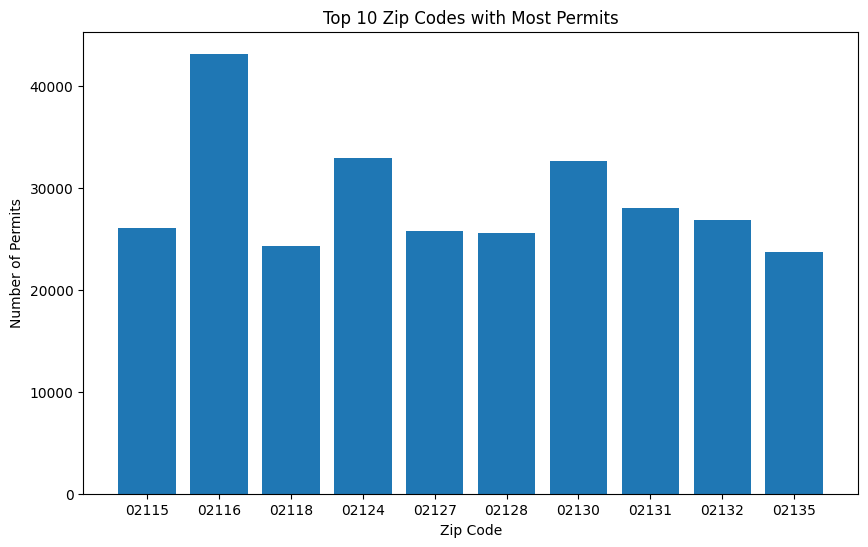

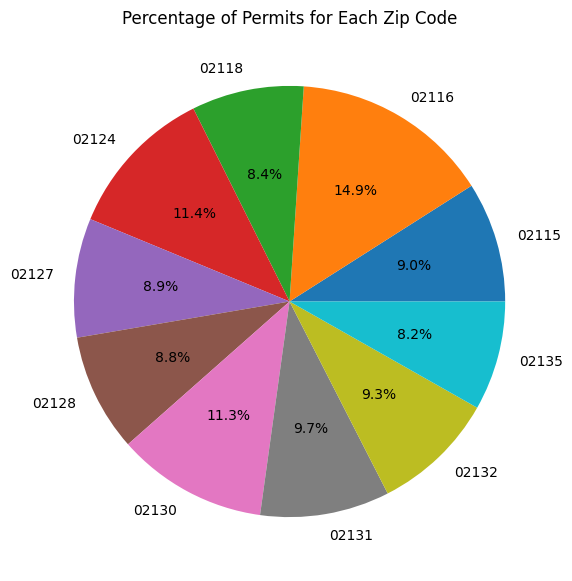

In [ ]:
sns.distplot(df['zip'])

# Set the title and axis labels
plt.title("Density Plot of Zip Codes")
plt.xlabel("Zip Code")
plt.ylabel("Density")

# Show the plot
plt.show()

# Get the top 10 zip codes with the most permits
top_10_zip_codes = df['zip'].value_counts().head(10)

# # Sort the totals in ascending order by zip code
top_10_zip_totals_sorted = top_10_zip_codes.sort_index()

# Convert the index from float to int correctly
top_10_zip_totals_sorted.index = top_10_zip_totals_sorted.index.astype(float).astype(int).astype(str)

# Optional: Format zip codes to have leading zeros if needed (e.g., 5 digits)
top_10_zip_totals_sorted.index = top_10_zip_totals_sorted.index.str.pad(width=5, side='left', fillchar='0')

# Create a bar chart of the top 10 zip codes
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_zip_totals_sorted.index, top_10_zip_totals_sorted.values)

# Set the title and axis labels
ax.set_title("Top 10 Zip Codes with Most Permits")
ax.set_xlabel("Zip Code")
ax.set_ylabel("Number of Permits")

# Create a pie chart of the number of permits for each zip code
plt.figure(figsize=(10, 7))
plt.pie(top_10_zip_totals_sorted.values, labels=top_10_zip_totals_sorted.index, autopct='%1.1f%%')
plt.title('Percentage of Permits for Each Zip Code')
plt.show()



- Zip code 02116 has the largest segment, colored in orange, representing 14.9% of the permits.
- Zip code 02131 is in gray, with 9.7% of the permits.
- Zip code 02132 is in yellow-green, with 9.3% of the permits.
- Zip code 02115 is in blue, with 9.0% of the permits.
- Zip code 02130 is in purple, with 8.9% of the permits.
- Zip code 02127 is in brown, with 8.8% of the permits.
- Zip code 02128 is in a darker purple, with 8.8% as well.
- Zip code 02118 is in green, with 8.4% of the permits.
- Zip code 02135 is in light blue, with 8.2% of the permits.
- Zip code 02124 is in red, with the second-largest segment at 11.4% of the permits.

The chart provides a visual representation of how permits are proportionally distributed across these zip codes, with 02116 having the highest percentage and 02135 having the lowest among those listed.

Correlation between zip code and total fees: 0.013502869660220495
Mean squared error: 677070053.16897


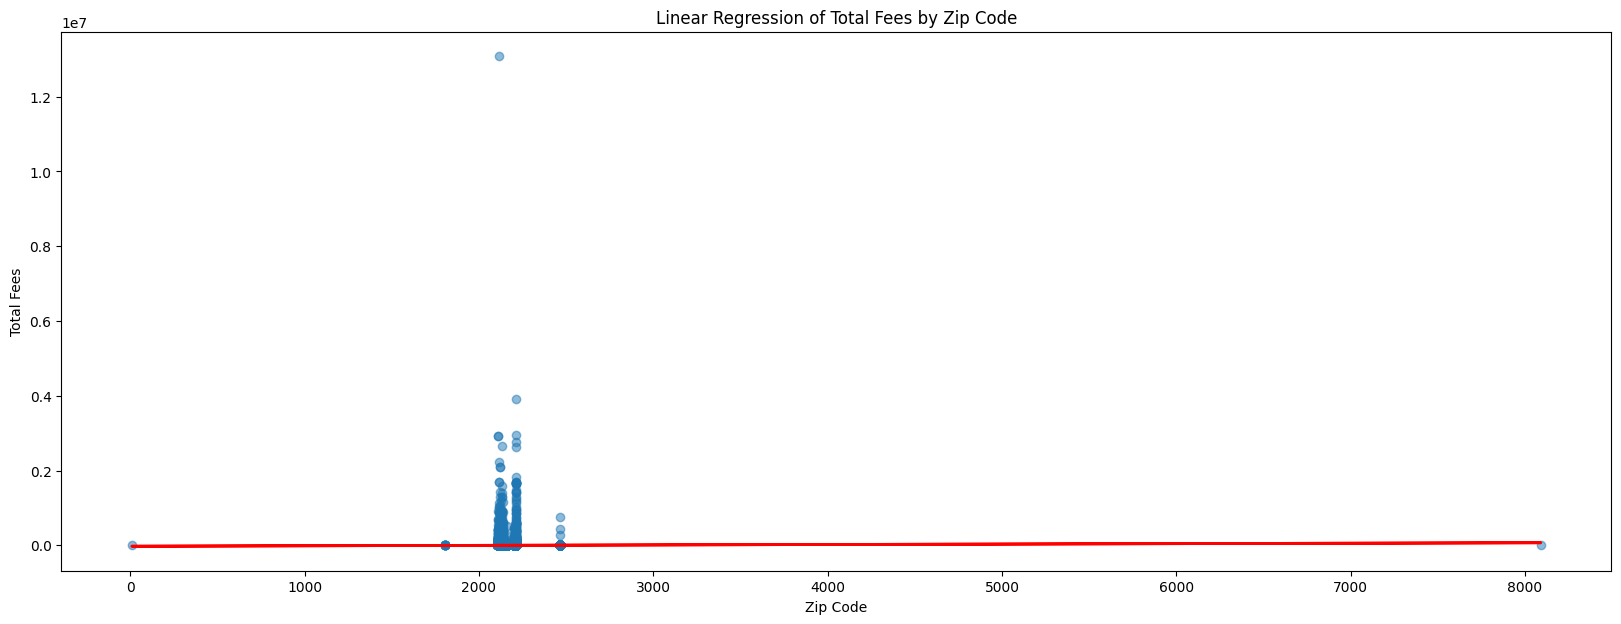

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Convert 'zip' to numeric (float or int), use errors='coerce' to set invalid parsing as NaN
df['zip'] = pd.to_numeric(df['zip'], errors='coerce')

# Ensure 'total_fees' is numeric as well (this step might be unnecessary if it's already numeric)
df['total_fees'] = pd.to_numeric(df['total_fees'], errors='coerce')

# Drop rows with NaN values in 'zip' or 'total_fees' after conversion
df = df.dropna(subset=['zip', 'total_fees'])

# Now, calculate the correlation coefficient between zip code and total fees
correlation = df['zip'].corr(df['total_fees'])
print(f"Correlation between zip code and total fees: {correlation}")

# Linear regression model can be trained as both 'zip' and 'total_fees' are numeric
model = LinearRegression()
model.fit(df[['zip']], df['total_fees'])  # 'zip' needs to be in a 2D array format
predicted_fees = model.predict(df[['zip']])

# Evaluate the model
mse = mean_squared_error(df['total_fees'], predicted_fees)
print(f"Mean squared error: {mse}")

# Visualize the results
plt.figure(figsize=(20, 7))
plt.scatter(df['zip'], df['total_fees'], alpha=0.5)
plt.plot(df['zip'], predicted_fees, color='red', linewidth=2)
plt.xlabel('Zip Code')
plt.ylabel('Total Fees')
plt.title('Linear Regression of Total Fees by Zip Code')
plt.show()


In [ ]:
df['permitnumber'].value_counts()

E553967      84
ETS692278    84
E1184787     84
SF462295     84
ELV559341    84
             ..
EFA845960     1
EFA845900     1
EFA845874     1
EFA845859     1
U49996370     1
Name: permitnumber, Length: 513507, dtype: int64

## Occupancy Type

In [ ]:
# Check the number of unique occupancytype

, '', regex=False).str.replace(',', '', regex=False).astype(float)

# Check the number of unique occupancy types
unique_occupancy_types = df['occupancytype'].unique()
num_unique_occupancy_types = len(unique_occupancy_types)

# print(f"Number of unique occupancy types: {num_unique_occupancy_types}")
unique_occupancy_types

array(['Mixed', 'Comm', 'Multi', '1-2FAM', '1-3FAM', 'Other', '1-4FAM',
       '5unit', '1-7FAM', '7More', '1Unit', '2unit', '4unit', '3unit',
       'VacLd', '6unit', '7unit', 'COMM'], dtype=object)

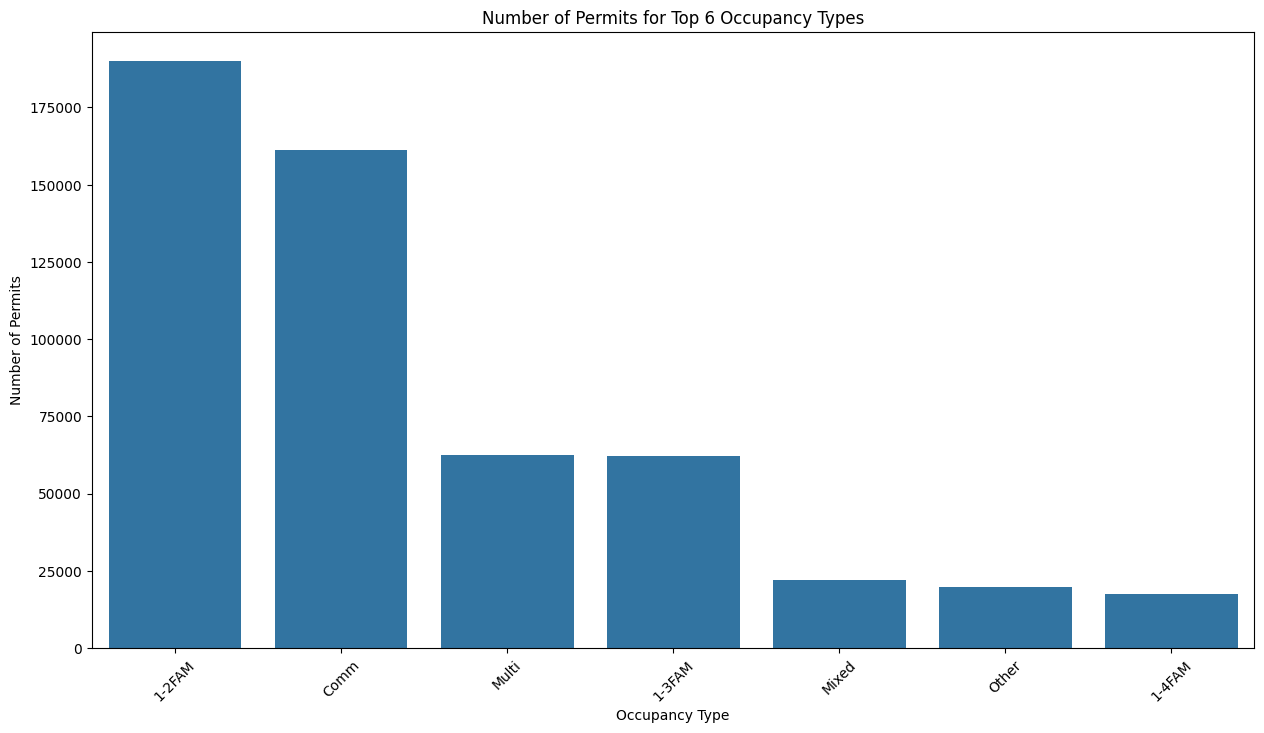

In [ ]:

import matplotlib.pyplot as plt
, '', regex=False).str.replace(',', '', regex=False).astype(float)

# Count the number of permits for each occupancy type
occupancy_type_counts = df['occupancytype'].value_counts()

# Get the top 6 occupancy types by count
top_6_occupancy_types = occupancy_type_counts.head(7)

# Create a bar chart of the top 6 occupancy types
plt.figure(figsize=(15, 8))
sns.barplot(x=top_6_occupancy_types.index, y=top_6_occupancy_types.values)
plt.xlabel('Occupancy Type')
plt.ylabel('Number of Permits')
plt.title('Number of Permits for Top 6 Occupancy Types')
plt.xticks(rotation=45)
plt.show()

Number of permits for each occupancy type:
occupancytype
1-2FAM    189951
Comm      161103
Multi      62631
1-3FAM     62102
Mixed      21898
Other      19781
1-4FAM     17442
1Unit       6854
VacLd       4884
7More       4478
1-7FAM      2230
3unit        752
2unit        613
4unit        414
5unit        310
6unit        304
7unit         67
COMM           1
dtype: int64


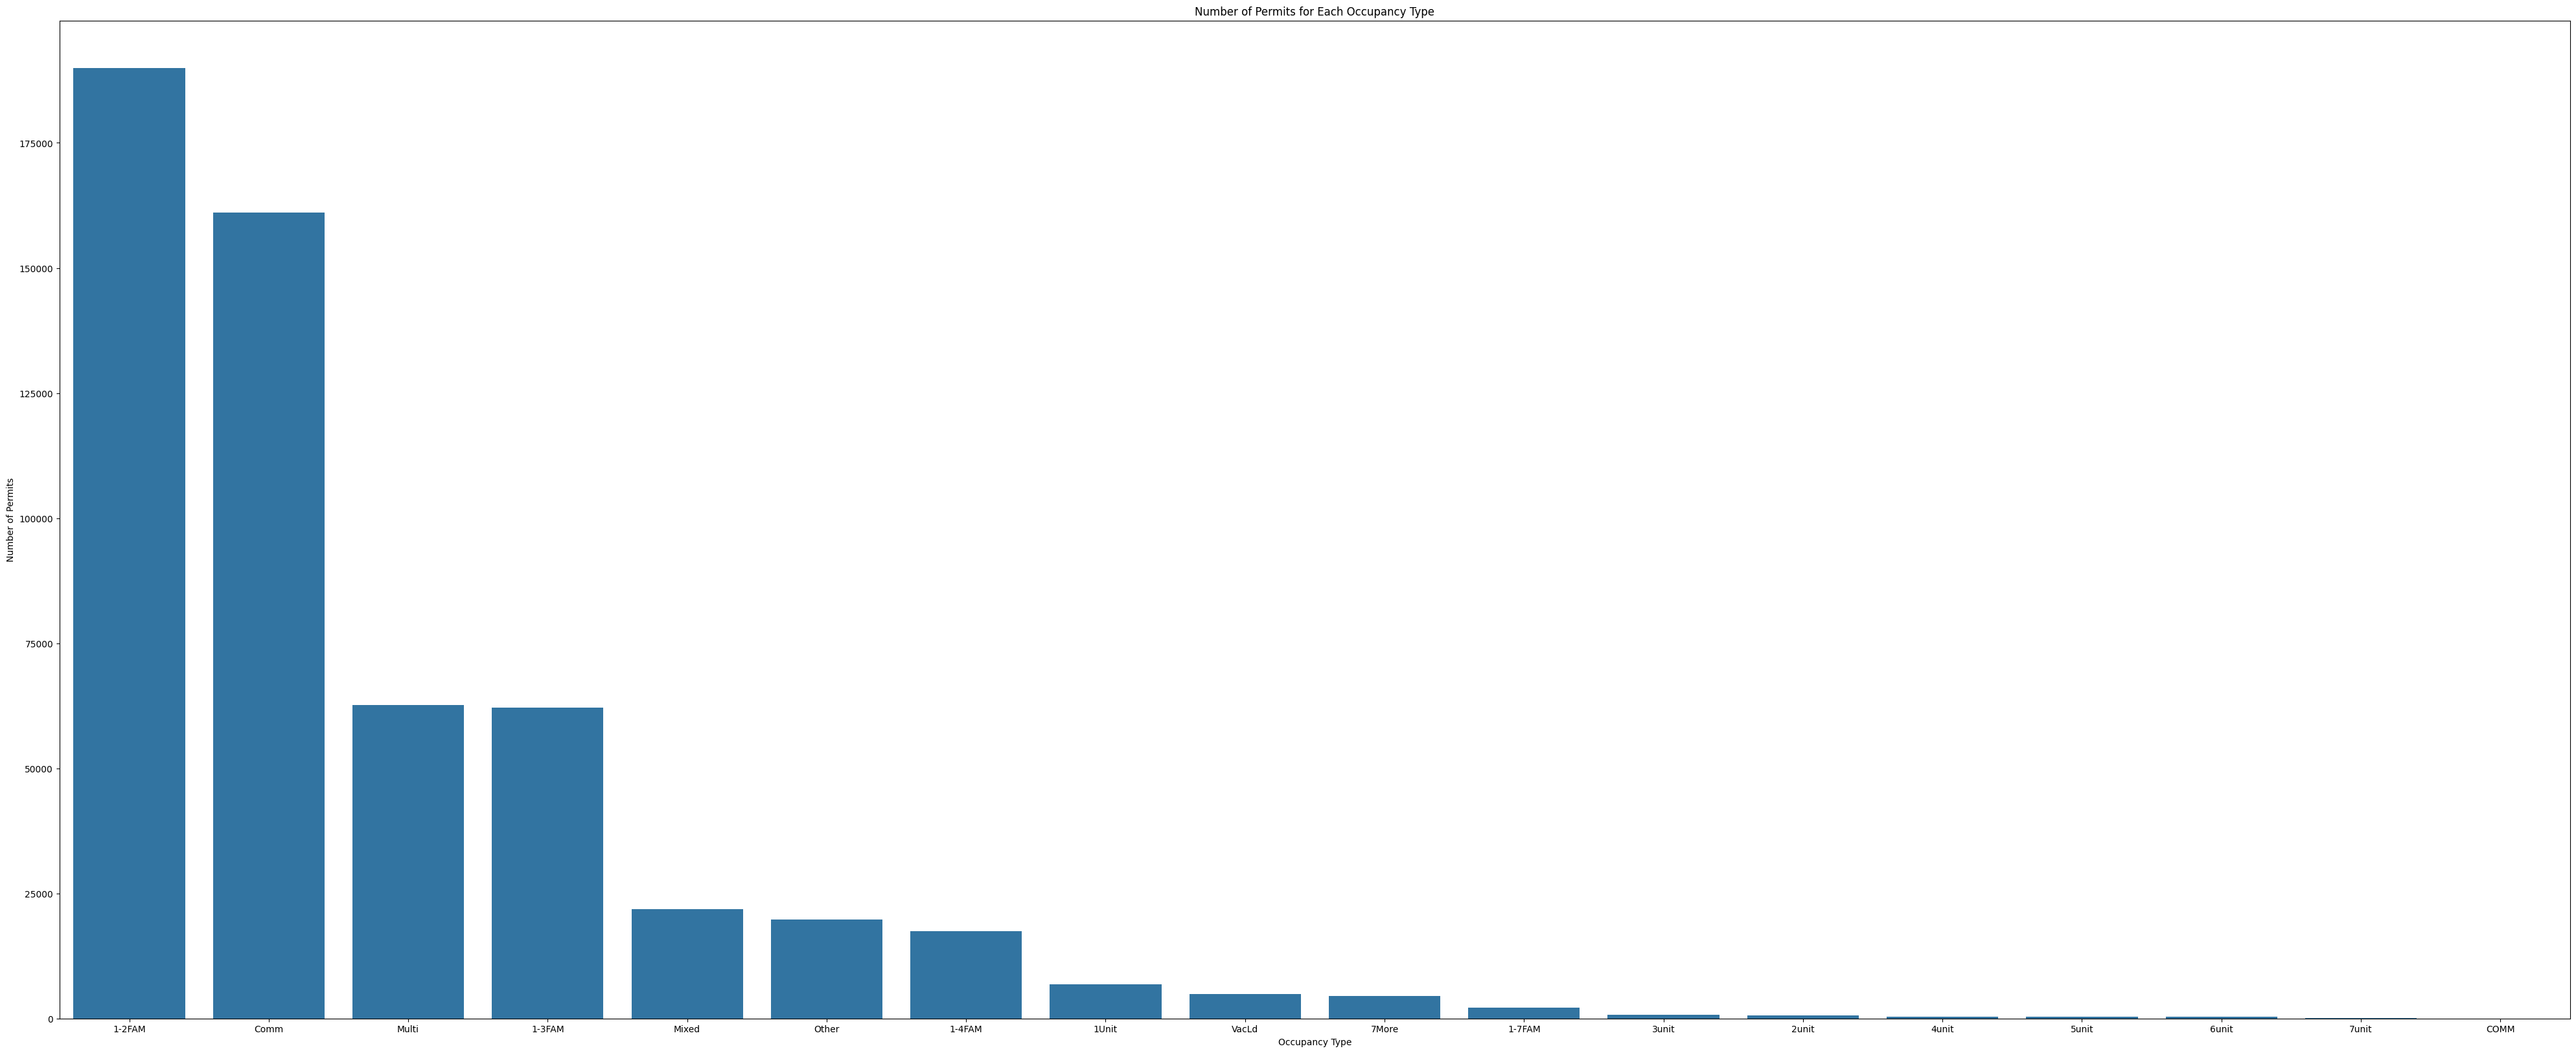

In [ ]:
# The relation between "declared_valuation" and "zip" check if a certain zip have a high declared valuation above 75th percent

import matplotlib.pyplot as plt
# Count the number of permits for each occupancy type
occupancy_type_counts = df.groupby('occupancytype').size().sort_values(ascending=False)

# Print the number of permits for each occupancy type
print(f"Number of permits for each occupancy type:\n{occupancy_type_counts}")

# Create a bar chart of the number of permits for each occupancy type
plt.figure(figsize=(50, 20))
sns.barplot(occupancy_type_counts)
plt.xlabel('Occupancy Type')
plt.ylabel('Number of Permits')
plt.title('Number of Permits for Each Occupancy Type')
plt.show()

# # Check if a certain zip have a high declared valuation above 75th percent
# df['declared_valuation'].describe()
# df['declared_valuation'].quantile(0.75)
# df[df['declared_valuation'] > df['declared_valuation'].quantile(0.75)]['zip'].value_counts()
